# Преобразование терминов в аббревиатуры

Есть несколько способов получить аббревиатуры из терминов:
- Использовать первые буквы слов из словосочетаний
- Выбрать буквы из слов
- Выбрать буквы из словосочетаний

Для простоты рассмотрим только первый cпособ

In [1]:
import pandas as pd

In [2]:
import re

In [3]:
terms = open('data/terms.txt').read().splitlines()

In [4]:
terms

['',
 'Бранстинга синдром',
 'Cubonaviculare obliquum',
 'Thoracicus longus',
 'Бурдаха ядро',
 'лейкопедез',
 'канал улитки',
 'дизестезия',
 'Свифт',
 'Фарбера синдром',
 'Suspenaorius duodeni',
 'диализ интракорпоральный',
 'Бродбента болезнь',
 'антигистаминные средства',
 'gerontoxon',
 'Genus inferior lateralis',
 'Пешкова камера',
 'симптом гомономный',
 'трансметилирование',
 'яд(-ы)',
 'плазмин',
 'синдром височно-теменной',
 'флеботонометр',
 'Limbocostale',
 'седалищный бугор',
 'Book',
 'преадаптация',
 'Штенгль',
 'Бернета риккетсиоз',
 'синдром пещеристого синуса',
 'Talonaviculare ossiculum,',
 'сферофакия-брахиморфия',
 'ананказм',
 'закон регрессии',
 'себорея',
 'тетано-',
 'Дель Кастильо',
 'Оберста',
 'титр вируса',
 'бородавчатка',
 'пневмография 1',
 'скребни',
 'бедренный канал',
 'Quick',
 'Вишневский',
 'Kolliker',
 'ди-',
 'кардиограф электроннолучевой',
 'Worth',
 'perspiratio insensibilis',
 'ката-',
 'сиалосцинтиграфия',
 'паргедония',
 'феномен патологичес

In [11]:
print('Количество терминов:', len(terms))

Количество терминов: 43340


In [12]:
terms_df = pd.DataFrame(terms, columns=['term'])

In [13]:
terms_df.head()

,term
0,
1,Бранстинга синдром
2,Cubonaviculare obliquum
3,Thoracicus longus
4,Бурдаха ядро


Посмотрим, есть ли стопслова в выборке

In [14]:
stopwords = dict.fromkeys(open('data/stop_words.txt').read().splitlines(), 0)

In [15]:
terms_df['has_stopword'] = terms_df.term.str.split().apply(lambda term: any([word in stopwords for word in term]))

In [28]:
terms_df.query('has_stopword == True')

,term,has_stopword,word_count,abbr_by_first_letters
551,фельдшерская справка о смерти,True,4,ФСОС
615,человек из Брокен-Хилла,True,3,ЧИБХ
647,преципитат 2 в,True,3,П2В
669,ветви к мосту мозга,True,4,ВКММ
670,ветви к перешейку зева,True,4,ВКПЗ
...,...,...,...,...
41268,проба на проницаемость,True,3,ПНП
41475,отделение заготовки и переливания крови,True,5,ОЗИПК
41703,упражнение(-я) в,True,2,УЯВ
43159,Сиваша набор для остеосинтеза,True,4,СНДО


In [29]:
terms_df.has_stopword.value_counts()

False    43121
True       219
Name: has_stopword, dtype: int64

Да, оказывается есть, тогда при анализе текстов удалять стоп-слова плохо вдвойне

Количество слов в словосочетаниях

In [17]:
terms_df['word_count'] = terms_df.term.str.split().map(len)

In [18]:
import seaborn as sns

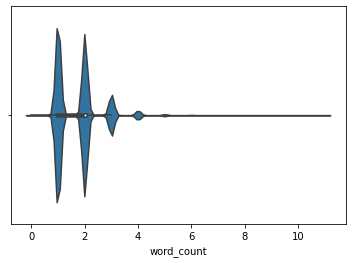

In [19]:
sns.violinplot(x='word_count', hue='has_stopword', data=terms_df)

In [20]:
terms_df.word_count.describe()

count    43340.000000
mean         1.706345
std          0.823349
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         11.000000
Name: word_count, dtype: float64

В основном состоят из двух слов

### Аббревиатуры из первых букв

In [21]:
def abbr_by_first_letters(x):
    return "".join([a[0] for a in re.split('[- ]', x) if len(a) > 0])
    
terms_df['abbr_by_first_letters'] = terms_df.term.apply(lambda x: abbr_by_first_letters(x).upper())

In [22]:
terms_df.head()

,term,has_stopword,word_count,abbr_by_first_letters
0,,False,0,
1,Бранстинга синдром,False,2,БС
2,Cubonaviculare obliquum,False,2,CO
3,Thoracicus longus,False,2,TL
4,Бурдаха ядро,False,2,БЯ


In [23]:
from collections import defaultdict

In [24]:
abbrs_variants = defaultdict(list)

for term, abbr in terms_df[['term', 'abbr_by_first_letters']].iloc:
    abbrs_variants[abbr].append(term)

In [25]:
with open('abbr_by_first_letters.txt', 'w') as f:
    for abbr, variants in abbrs_variants.items():
        f.write(abbr + "\t" + "\t".join(variants) + "\n")

In [26]:
terms_df[['term', 'abbr_by_first_letters']].to_csv('term_abbrs.csv', index=False)